In [5]:
import numpy as np
import matplotlib.pyplot as plt
l = 500
cols = 100
#cols, lines
X = np.random.randn(l, cols)
X = np.hstack((X, np.ones((l, 1))))
a = np.random.randn(cols+1)
y = a@X.T

In [6]:
print(y.shape)
print(a.shape)
print(X.shape)

(500,)
(101,)
(500, 101)


In [12]:
class LinearRegression():
    
    def __init__(self, y: np.ndarray, X: np.ndarray, max_iter=100) -> None:
        self.y = y
        self.X = X
        self.max_iter = max_iter
        self.cost = []
        return None
    def __str__(self):
        return """this is linear regression class, 
                    this needs some params 
                    1. target(response variable): 1-dimentional target data
                    2. explanantry variable : multi-dimentional data(this do not need 1-d)
                    3. max_iter: iteration nums."""
    def __repr__(self):
        return f"{self}"
    def cost_function(self, a: np.ndarray) -> list:
        """
        J(θ)=(<θ,X>-y)^2
        """
        J = (self.y - a@self.X.T) @ (self.y - a@self.X.T).T
        return J

    def gradient_descent(self, learning_rate: float) -> np.ndarray:
        a = np.zeros(cols+1)
        l_rate = learning_rate

        for iter in range(self.max_iter):
            self.cost.append(self.cost_function(a)) 
            tmp_a = a
            for i in range(len(a)):
                """
                係数の更新
                """
                a[i] = a[i] - l_rate*(-2)*self.X[:, i].dot(self.y - tmp_a.dot(self.X.T))
        return (a)

    def draw_cost_function(self) -> None:
        x = [i for i in range(self.max_iter)]
        plt.scatter(x, self.cost)
        return None

lr = LinearRegression(y, X, max_iter=1000)
print(lr)

this is linear regression class, 
                    this needs some params 
                    1. target(response variable): 1-dimentional target data
                    2. explanantry variable : multi-dimentional data(this do not need 1-d)
                    3. max_iter: iteration nums.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in matmul


nan


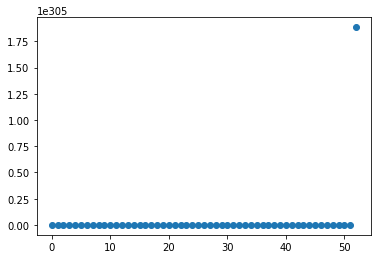

In [13]:
_a = lr.gradient_descent(learning_rate=0.01)
err = a - _a
print(err@err.T)
lr.draw_cost_function()